#<b>About Dataset</b>#

<p>Natural Gas – Imports and Exports</p>
<p>Canada is the world’s fifth largest producer of natural gas and accounts for around five per cent of global production. Natural gas production in Canada is predominantly from the Western Canadian Sedimentary Basin in British Columbia, Alberta, and Saskatchewan. Canadian natural gas supply currently exceeds domestic consumption. Canada’s natural gas markets are heavily integrated with those of the United States and Canada exports its surplus natural gas to the U.S., while importing smaller amounts from the U.S. into Central Canada. The National Energy Board regulates the export and import of natural gas. Orders or licenses are required to export or import natural gas to and from Canada. Holders of these authorizations report monthly on their activities to the Board. Import and export activities are available by Port from 1985 to present. Data is delayed by approximately 2 months.</p>
<p>Publisher - Current Organization Name: Canada Energy Regulator</p>
<p><b>DATA DICTIONARY</b></p>
<ul>
  <li>C = Categorical</li>
  <li>N = Numerical</li>
  <li>D = Date</li>
</ul>
<p>(D) Period: 01/01/1985 to most recently available</p>
<p>(N) Year: 1985 to most recently available</p>
<p>(C) Month: January, February, March, April, May, June, July, August, September, October, November, December</p>
<p>(C) Flow: Exports, Imports</p>
<p>(C) Port: Aden, Brunswick, Cardston, Chippawa, Cornwall, Corunna, Courtright, Coutts, East Hereford, Elmore, Emerson, Fort Frances, Highwater, Huntingdon, Iroquois, Kingsgate, Loomis, Monchy, Napierville, Niagara Falls, North Portal, Ojibway (Windsor), Philipsburg, Rainy River, Reagan Field, Sarnia, Sarnia/Blue Water, Sault Ste Marie, Sierra, Sprague, St Clair, St Stephen, Willow Creek, Windsor (Ojibway), <s>Total</s></p>
<p>(N) Volume (10^3 m3): Volume of natural gas exports / imports in thousand cubic metres</p>
<p><s>(N) Volume (MCF): Volume of natural gas exports / imports in thousand cubic feet</s></p>
<p><s>(N) Value (CN dollars): Value of natural gas exports / imports in Canadian dollars</s></p>
<p>(N) Value (US dollars): Value of natural gas exports / imports in US dollars</p>
<p><s>(N) Price (CN dollars/GJ): Average price of natural gas exports / imports in Canadian dollars per gigajoule</s></p>
<p><s>(N) Price (US dollars/MMBTU): Average price of natural gas exports / imports in US dollars per MMBTU</s></p>
<b><p>Notes:</p></b>
<p>Value (CN dollars) and Price (CN dollars/GJ) avoided because we are going to work with US dollars.</p>
<p>All measures will be analyzed by 10^3 m3.</p>
<p>Confidential: Confidentiality rules have been applied to this report. Some data is considered confidential and cannot be released.</p>
<p>m3: Cubic metres</p>
<p>MCF: Thousand cubic feet</p>
<p>GJ: Gigajoule</p>
<p>One gigajoule (GJ) equals one billion joules (J). A gigajoule of natural gas is about 25.5 cubic metres at standard conditions. One gigajoule of natural gas is approximately equivalent to 27 litres of fuel oil, 39 litres of propane, 26 litres of gasoline or 277 kilowatt hours of electricity.</p>
<p>MMBTU: Million British thermal units</p>
<p>Standard unit of measurement for natural gas financial contracts (also equal to 1 dekatherm).</p>


<p>BIBLIOGRAPHY</p>

https://open.canada.ca/data/en/dataset/b2f35cd0-4e54-4960-bdb1-7b040f5beaa0

https://open.canada.ca/data/en/dataset/8cb1d0d0-6ea7-4f6d-b01d-a38fafdcce77

<p>ADDITIONAL INFORMATION</p>

https://www.thecanadianencyclopedia.ca/en/article/recession

https://www.capp.ca/natural-gas/what-is-natural-gas/#:~:text=Where%20is%20Natural%20Gas%20Found,in%20Ontario%20and%20New%20Brunswick.

<p>OBJECTIVES - Analysis</p>
What happened to natural gas in the economic Canadian crisis?
How have export and import natural gas varied across years in Canada? Is there any pattern?
How has the price fluctuated over these years? How did this affect Canada?
Which are the top ten regions who buy natural gas? Have these changed across years?

<p>OBJECTIVES - Analytics</p>
What will natural gas fluctuate in ten years?
Are there any categories by region defined by import/export volumen?
Regarding the top ten regions who buy natural gas. The next ten years, will they change?


# Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import auth
import gspread
from google.auth import default
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import backend as K

# <H2><b>1. IMPORTING DATA</H2></b>

## <H3>1.1. Google</H3>

In [2]:
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
#defining my worksheet
worksheet = gc.open('natural-gas-exports-and-imports-monthly').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
dfRow = pd.DataFrame(rows)
#creating columns name
dfRow.columns = dfRow.iloc[0]
dfRow = dfRow.iloc[1:]

## <H3>1.2. Local storage</H3>

In [4]:
# BASE_DIR = os.path.dirname(os.path.abspath('__file__'))
# fileCSV = os.path.join(BASE_DIR, 'natural-gas-exports-and-imports-monthly(df1).csv')
# dfRow = pd.read_csv(fileCSV)

## <H3>1.3. Selecting columns from dataframe.</H3>

In [5]:
dfRow = dfRow[['Year', 'Month', 'Flow', 'Port', 'Region', 'Volume (10^3m3)', 'Value (US$)']]

In [6]:
dfRow.rename(columns={'Year': 'year', 'Month': 'month',
                      'Flow': 'flow', 'Port': 'port',
                      'Region': 'region', 'Volume (10^3m3)': 'volumen_10k_m3',
                      'Value (US$)':'value_US'}, inplace=True)

<ipython-input-6-eaf63db2a93d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRow.rename(columns={'Year': 'year', 'Month': 'month',


## <H3>1.4. Deleting undesired observations.</H3>

In [7]:
dfRow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13027 entries, 1 to 13027
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            13027 non-null  object
 1   month           13027 non-null  object
 2   flow            13027 non-null  object
 3   port            13027 non-null  object
 4   region          13027 non-null  object
 5   volumen_10k_m3  13027 non-null  object
 6   value_US        13027 non-null  object
dtypes: object(7)
memory usage: 712.5+ KB


### <H3>1.4.1 Checking strings in integer columns</H3>

In [8]:
alphaIndex = []
for index,value in enumerate(dfRow.year):
    if re.match(r'[a-zA-Z!"#$%&\'()\*\+,/:;<=>?@[\]^_`{|}~]', value) != None:
        alphaIndex.append(index)

len(alphaIndex)

0

In [9]:
alphaIndex = []
for index,value in enumerate(dfRow.volumen_10k_m3):
    if re.match(r'[a-zA-Z!"#$%&\'()\*\+,/:;<=>?@[\]^_`{|}~]', value) != None:
        alphaIndex.append(index)

len(alphaIndex)

0

In [10]:
alphaIndex = []
for index,value in enumerate(dfRow.value_US):
    if re.match(r'[a-zA-Z!"#$%&\'()\*\+,/:;<=>?@[\]^_`{|}~]', value) != None:
        alphaIndex.append(index)

len(alphaIndex)

351

In [11]:
dfRow.iloc[alphaIndex].value_US.unique()

array(['Confidential'], dtype=object)

In [12]:
dfRow.value_US.replace('Confidential', np.nan, inplace=True)

### <H3>1.4.2 Deleting 'Total' values</H3>

In [13]:
dfRow.drop(dfRow.port.loc[dfRow.port == 'Total'].index, inplace=True)

# <H2><b>2. DATA SANITY CHECKS</H2></b>

## <H3>2.1. Structure of dataframe.</H3>

In [14]:
dfRow.shape

(12111, 7)

In [15]:
dfRow.columns

Index(['year', 'month', 'flow', 'port', 'region', 'volumen_10k_m3',
       'value_US'],
      dtype='object', name=0)

In [16]:
dfRow.head()

,year,month,flow,port,region,volumen_10k_m3,value_US
1,1985,January,Exports,Aden,MidWest,26265.9,2815167.57
2,1985,January,Exports,Cardston,MidWest,0.4,0
3,1985,January,Exports,Cornwall,East,31849.5,4331850.57
4,1985,January,Exports,Emerson,MidWest,415051,51742350.22
5,1985,January,Exports,Fort Frances,East,11125.9,1508022.59


In [17]:
dfRow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12111 entries, 1 to 13026
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            12111 non-null  object
 1   month           12111 non-null  object
 2   flow            12111 non-null  object
 3   port            12111 non-null  object
 4   region          12111 non-null  object
 5   volumen_10k_m3  12111 non-null  object
 6   value_US        11760 non-null  object
dtypes: object(7)
memory usage: 756.9+ KB


## <H3>2.2. Descriptive analysis.</H3>

In [18]:
dfRow[['year', 'month', 'flow', 'port', 'region', 'volumen_10k_m3', 'value_US']].nunique()

0
year                 39
month                12
flow                  2
port                 35
region                4
volumen_10k_m3    11850
value_US          11667
dtype: int64

In [19]:
dfRow.year.unique()

array(['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

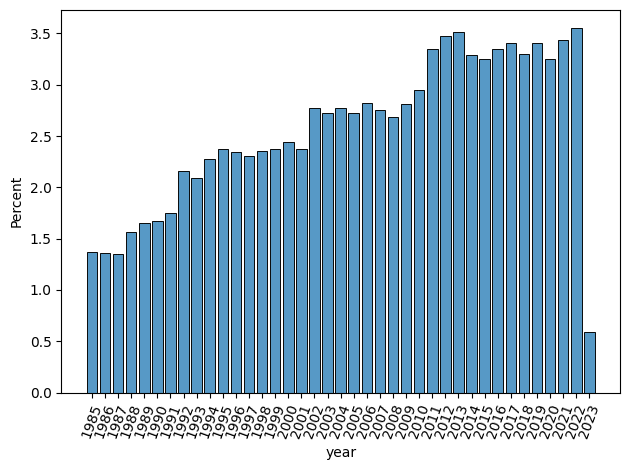

In [20]:
sns.histplot(x='year', data=dfRow, stat="percent", discrete=True, shrink=.8)
plt.xticks(rotation=70)
plt.tight_layout()

In [21]:
dfRow.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [22]:
dfRow.month = pd.Categorical(dfRow.month, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                            'August', 'September', 'October', 'November', 'December'], ordered=True)

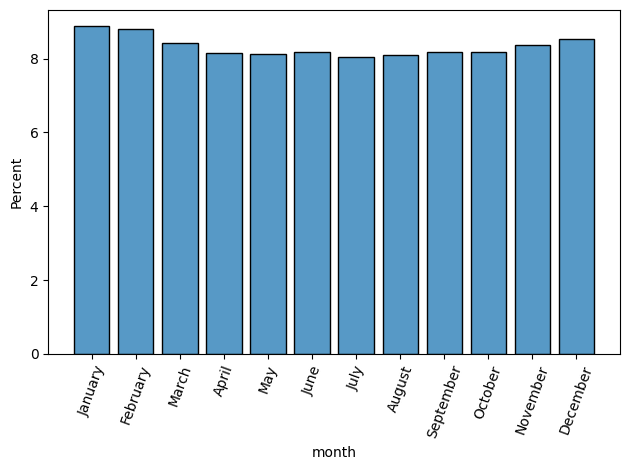

In [23]:
sns.histplot(x='month', data=dfRow, stat="percent", discrete=True, shrink=.8)
plt.xticks(rotation=70)
plt.tight_layout()

In [24]:
dfRow.flow.unique()

array(['Exports', 'Imports'], dtype=object)

In [25]:
dfRow.flow = pd.Categorical(dfRow.flow, categories=['Exports', 'Imports'])

<Axes: xlabel='flow', ylabel='Percent'>

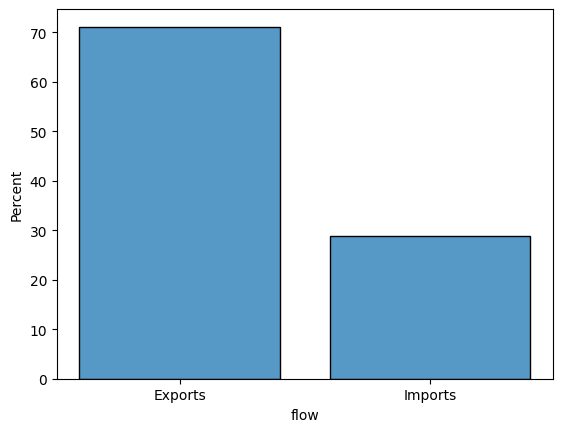

In [26]:
sns.histplot(x='flow', data=dfRow, stat="percent", discrete=True, shrink=.8)

In [27]:
dfRow.region.unique()

array(['MidWest', 'East', 'West', ''], dtype=object)

In [28]:
dfRow.region = pd.Categorical(dfRow.region, categories=['East', 'MidWest', 'West'], ordered=True)

<Axes: xlabel='region', ylabel='Percent'>

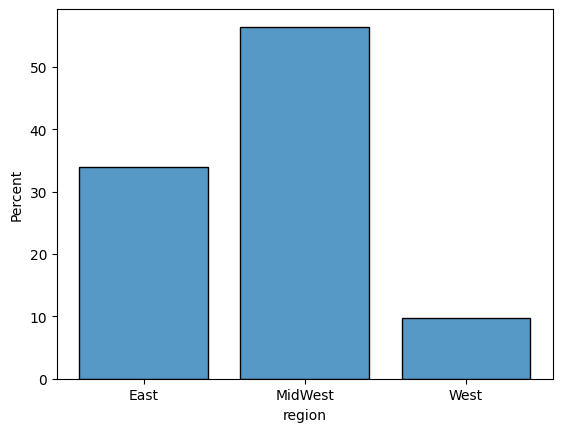

In [29]:
sns.histplot(x='region', data=dfRow, stat="percent", discrete=True, shrink=.8)

In [30]:
dfRow.port.unique()

array(['Aden', 'Cardston', 'Cornwall', 'Emerson', 'Fort Frances',
       'Huntingdon', 'Kingsgate', 'Monchy', 'Niagara Falls',
       'Ojibway (Windsor)', 'Philipsburg', 'Reagan Field', 'Sprague',
       'Coutts', 'Highwater', 'St Clair', 'Sarnia', 'Iroquois',
       'Rainy River', 'Windsor (Ojibway)', 'Chippawa', 'Napierville',
       'Loomis', 'North Portal', 'Sault Ste Marie', 'Sarnia/Blue Water',
       'Corunna', 'Willow Creek', 'East Hereford', 'St Stephen', 'Elmore',
       'Courtright', 'Sierra', 'Brunswick', ''], dtype=object)

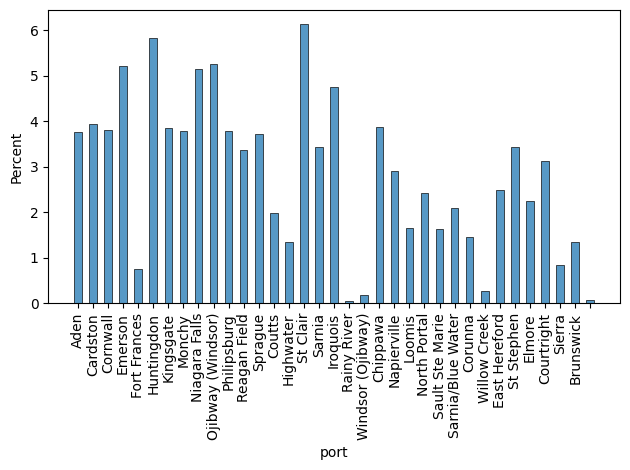

In [31]:
sns.histplot(x='port', data=dfRow, stat="percent", discrete=True, shrink=.5)
plt.xticks(rotation=90)
plt.tight_layout()

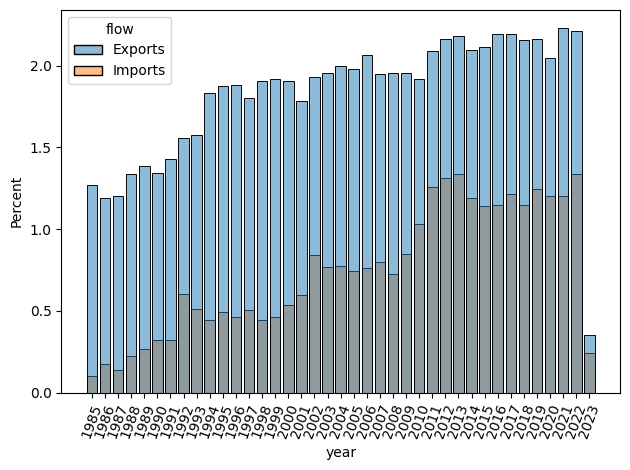

In [32]:
sns.histplot(x='year', data=dfRow, stat="percent", discrete=True, shrink=.8, hue='flow')
plt.xticks(rotation=70)
plt.tight_layout()

<Axes: xlabel='region', ylabel='Percent'>

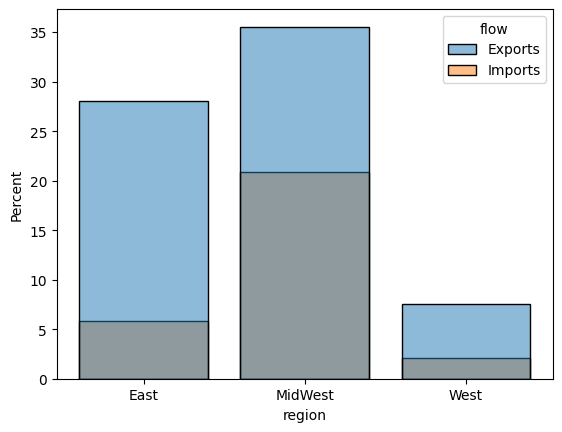

In [33]:
sns.histplot(x='region', data=dfRow, stat="percent", discrete=True, shrink=.8, hue='flow')

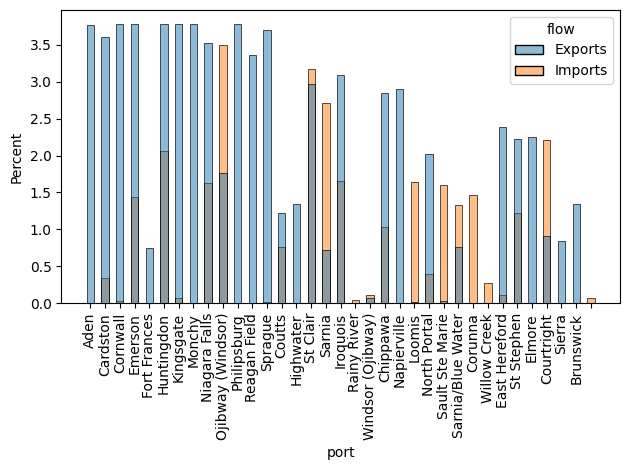

In [34]:
sns.histplot(x='port', data=dfRow, stat="percent", discrete=True, shrink=.5, hue='flow')
plt.xticks(rotation=90)
plt.tight_layout()

We have to divide in two analysis regarding flow (exports and imports). This represents all code and analysis will be duplicated. But we want to analyze exportations to know how Canada will be affected with this eco-friendly behaviour that countries around the world have been taking.

## <H3>2.3. Final dataframe.</H3>

In [35]:
df1 = dfRow[dfRow.flow == 'Exports'].copy().reset_index(drop=True)

In [36]:
df1.drop(columns='flow', inplace=True)

In [37]:
df1.replace(['', ' '], np.nan, inplace=True)

In [38]:
df1 = df1.astype({'year':'int64',
        'month':'category',
        'port':'object',
        'region':'category',
        'volumen_10k_m3':'float64',
        'value_US':'float64'})

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8613 entries, 0 to 8612
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            8613 non-null   int64   
 1   month           8613 non-null   category
 2   port            8613 non-null   object  
 3   region          8613 non-null   category
 4   volumen_10k_m3  8613 non-null   float64 
 5   value_US        8310 non-null   float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 286.6+ KB


In [40]:
df1.describe(include='all')

,year,month,port,region,volumen_10k_m3,value_US
count,8613.000000,8613,8613,8613,8.613000e+03,8.310000e+03
unique,NaN,12,31,3,NaN,NaN
top,NaN,January,Cornwall,MidWest,NaN,NaN
freq,NaN,746,458,4302,NaN,NaN
mean,2005.225705,NaN,NaN,NaN,3.434331e+05,4.799666e+07
std,10.638429,NaN,NaN,NaN,5.243802e+05,8.766730e+07
min,1985.000000,NaN,NaN,NaN,2.700000e-02,0.000000e+00
25%,1996.000000,NaN,NaN,NaN,9.019035e+03,9.794788e+05
50%,2006.000000,NaN,NaN,NaN,3.194980e+04,4.310123e+06
75%,2014.000000,NaN,NaN,NaN,6.330494e+05,6.312794e+07


## <H3>2.4. Finding Duplicates.</H3>

In [41]:
df1.duplicated().sum()

0

In [42]:
df1[['year', 'month', 'port', 'region']].duplicated().sum()

0

## <H3>2.5. Finding Outliers</H3>

<Axes: xlabel='volumen_10k_m3'>

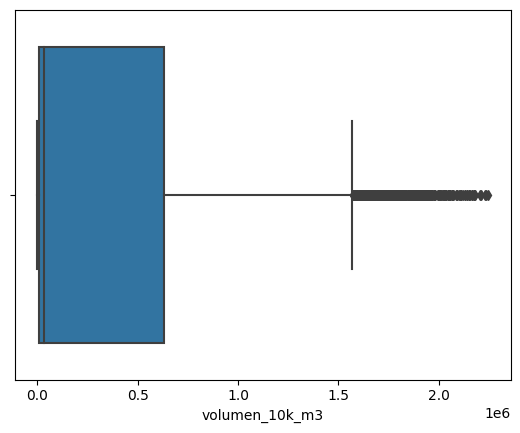

In [43]:
sns.boxplot(x='volumen_10k_m3', data=df1)

<Axes: xlabel='value_US'>

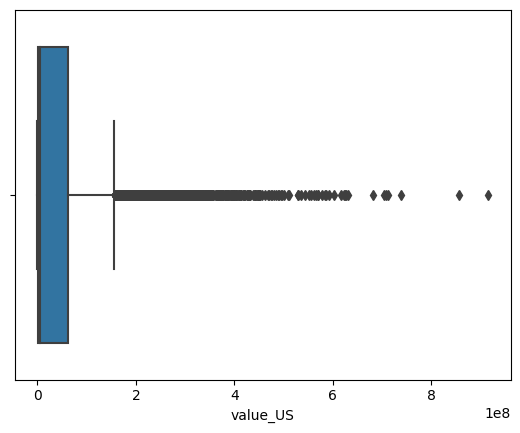

In [44]:
sns.boxplot(x='value_US', data=df1)

<Axes: xlabel='value_US', ylabel='volumen_10k_m3'>

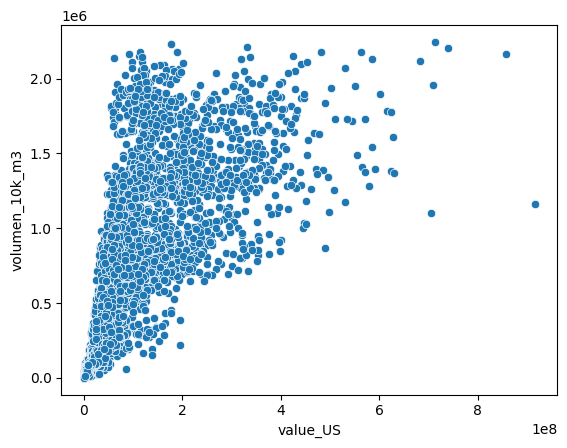

In [45]:
sns.scatterplot(data=df1, x='value_US', y='volumen_10k_m3')

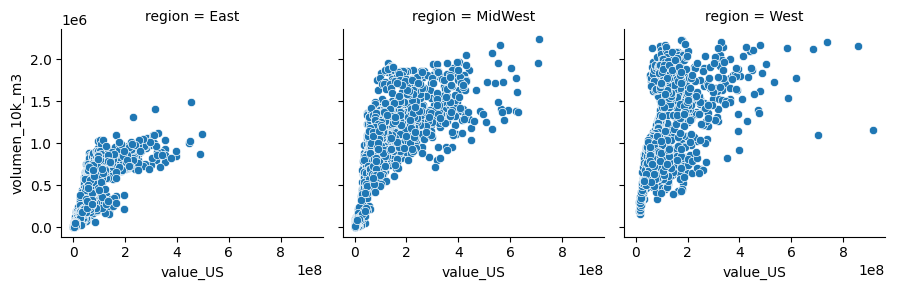

In [46]:
g = sns.FacetGrid(data=df1, col="region")
g.map(sns.scatterplot, 'value_US', 'volumen_10k_m3')
g.add_legend()

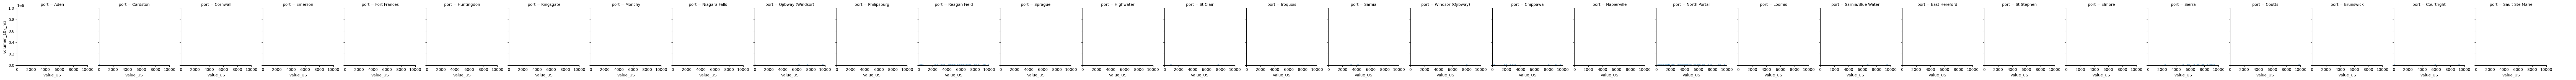

In [47]:
g = sns.FacetGrid(data=df1, col="port", xlim=(0, 10000), ylim=(0, 1000000))
g.map(sns.scatterplot, 'value_US', 'volumen_10k_m3')
g.add_legend()

We can look at in some ports there were a value_US with almost zero in volumen_10k_m3. That is clearly an issue to analyze the data.

### <H3>2.5.1 IQR<H3>

All observations above Q3+1.5xIQR or below Q1−1.5xIQR are considered as potential outliers.

In [48]:
Q1_valueUS = np.percentile(df1.value_US.dropna(), 25)
Q3_valueUS = np.percentile(df1.value_US.dropna(), 75)
Q1_volume = np.percentile(df1.volumen_10k_m3.dropna(), 25)
Q3_volume = np.percentile(df1.volumen_10k_m3.dropna(), 75)

In [49]:
lowerOutlier_valueUS = Q1_valueUS - 1.5*(Q3_valueUS - Q1_valueUS)
print(lowerOutlier_valueUS)
HigherOutlier_valueUS = Q3_valueUS + 1.5*(Q3_valueUS - Q1_valueUS)
print(HigherOutlier_valueUS)

-92243217.705
156350639.715


In [50]:
lowerOutlier_volume = Q1_volume - 1.5*(Q3_volume - Q1_volume)
print(lowerOutlier_volume)
HigherOutlier_volume = Q3_volume + 1.5*(Q3_volume - Q1_volume)
print(HigherOutlier_volume)

-927026.5738499999
1569095.04975


The negative results to find lower outliers don't have a meaning for the data. For that reason, we have to analyze values close to zero. On the other side, high outliers cannot be real outliers if the volumen and value are proportional.

In [51]:
sum(df1.value_US > HigherOutlier_valueUS)

813

In [52]:
sum(df1.volumen_10k_m3 > HigherOutlier_volume)

383

In [53]:
sum((df1.value_US > HigherOutlier_valueUS) & (df1.volumen_10k_m3 > HigherOutlier_volume))

237

### <H3>2.5.2 Values_US equal to zero and Volumen_10k_m3 less than 1</H3>

<p>We have a issue when we talk about in one month the value_US is closed to zero and\or volumen_10k_m3 too. For Canada this is impossible, becuase for a long time Canada has been one of the most important sources in natural gas in the world.</p>

<ul>
  <li>Value_US or Volumen_10k_m3 is lower, they will be replaced to missed value.</li>
  <li>Both are lower, the observation will be deleted.</li>
</ul>

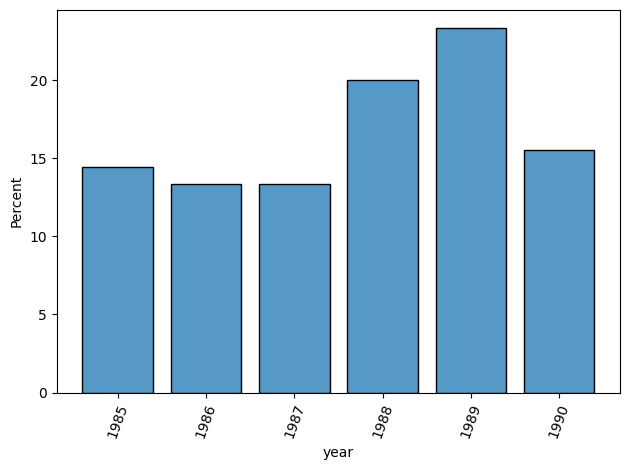

In [54]:
sns.histplot(x='year', data=df1[df1.value_US == 0], stat="percent", discrete=True, shrink=.8)
plt.xticks(rotation=70)
plt.tight_layout()

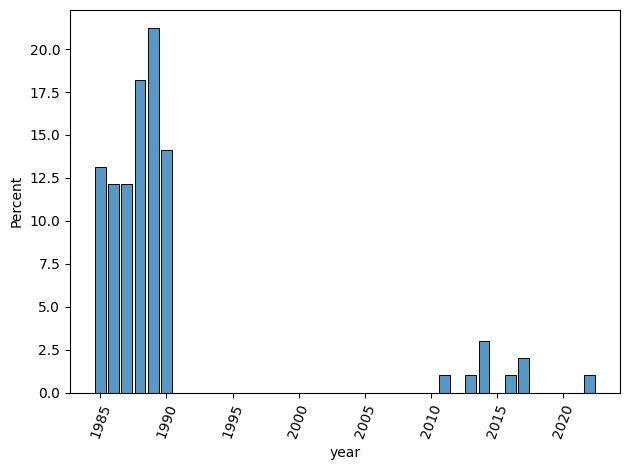

In [55]:
sns.histplot(x='year', data=df1[df1.volumen_10k_m3 <= 1], stat="percent", discrete=True, shrink=.8)
plt.xticks(rotation=70)
plt.tight_layout()

<Axes: xlabel='year', ylabel='Percent'>

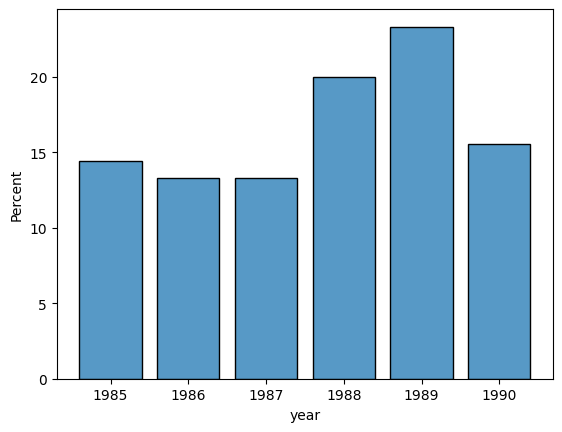

In [56]:
sns.histplot(x='year', data=df1[(df1.value_US == 0) & (df1.volumen_10k_m3 <= 1)], stat="percent", discrete=True, shrink=.8)

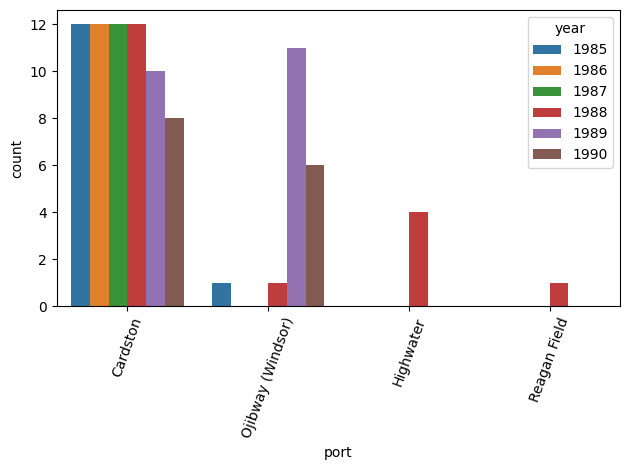

In [57]:
sns.countplot(x='port', data=df1[df1.value_US == 0], hue='year')
plt.xticks(rotation=70)
plt.tight_layout()

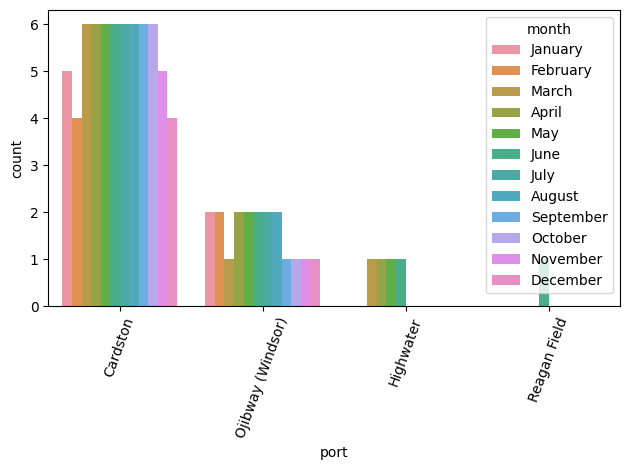

In [58]:
sns.countplot(x='port', data=df1[df1.value_US == 0], hue='month')
plt.xticks(rotation=70)
plt.tight_layout()

In [59]:
df1[df1.value_US == 0].volumen_10k_m3.unique()

array([0.4, 0.1, 0.2, 0.3])

In [60]:
df1.drop(df1.loc[(df1.value_US == 0) & (df1.volumen_10k_m3 <= 1)].index, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [61]:
df1[df1.value_US == 0]

,year,month,port,region,volumen_10k_m3,value_US


In [62]:
df1[df1.volumen_10k_m3 <= 1]

,year,month,port,region,volumen_10k_m3,value_US
5519,2011,September,Courtright,MidWest,0.100000,16.31
6097,2013,November,Niagara Falls,East,0.078000,NaN
6210,2014,April,Niagara Falls,East,0.078060,NaN
6231,2014,May,Niagara Falls,East,0.100000,NaN
6252,2014,June,Niagara Falls,East,0.078100,NaN
6819,2016,September,Chippawa,East,0.426700,46.87
7060,2017,August,Chippawa,East,0.346700,37.21
7062,2017,August,Courtright,MidWest,0.027000,2.86
8435,2022,October,St Stephen,East,0.084983,NaN


For these ports where volumen_10k_m3 <= 1 we will delete them (besides, value_US are not normal).

In [63]:
df1.drop(df1.loc[df1.volumen_10k_m3 <= 1].index, inplace=True)

In [64]:
df1[df1.volumen_10k_m3 <= 1]

,year,month,port,region,volumen_10k_m3,value_US


In [65]:
df1.reset_index(drop=True, inplace=True)

## <H3>2.6. Finding Missing Values.</H3>

In [66]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])

missing_data(df1)

,Total,Percentage
0,,
value_US,298,3.500117
year,0,0.000000
month,0,0.000000
port,0,0.000000
region,0,0.000000
volumen_10k_m3,0,0.000000


### <H3>2.6.1 Descriptive Missing Values.</H3>

In [67]:
dfNaValueUS = df1[df1['value_US'].isna()]

In [68]:
dfNaValueUS.nunique()

0
year               21
month              12
port                5
region              3
volumen_10k_m3    298
value_US            0
dtype: int64

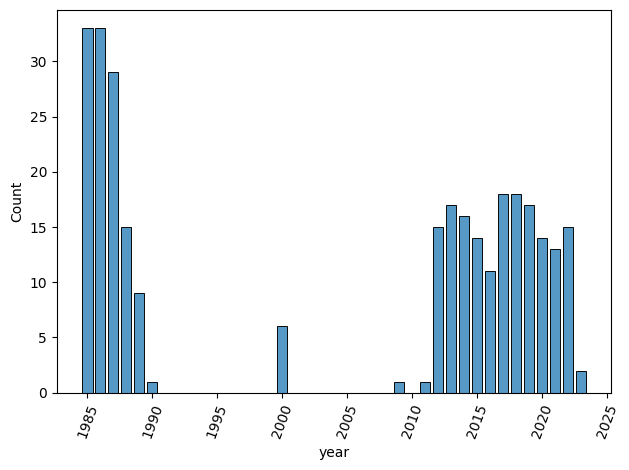

In [69]:
sns.histplot(x='year', data=dfNaValueUS, discrete=True, shrink=.8)
plt.xticks(rotation=70)
plt.tight_layout()

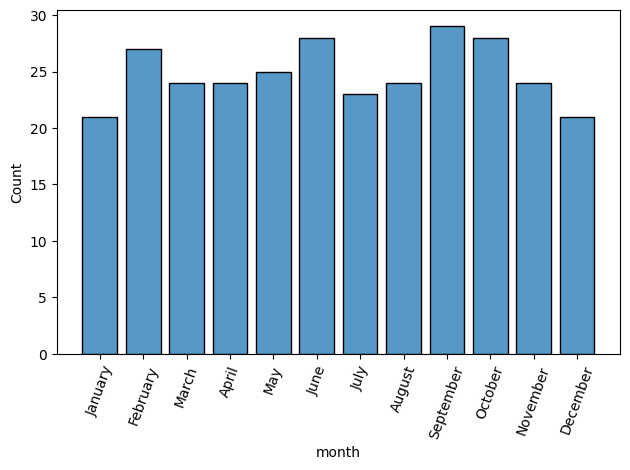

In [70]:
sns.histplot(x='month', data=dfNaValueUS, discrete=True, shrink=.8)
plt.xticks(rotation=70)
plt.tight_layout()

<Axes: xlabel='region', ylabel='Percent'>

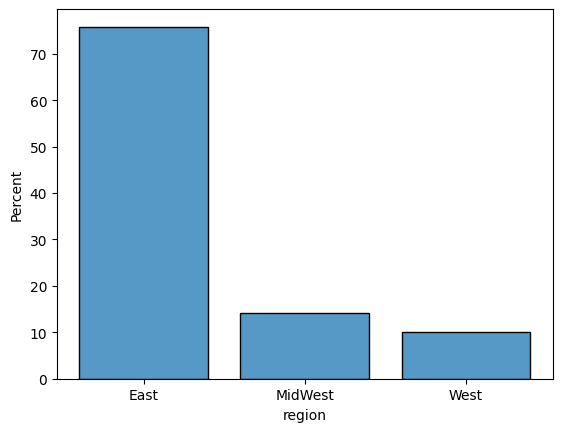

In [71]:
sns.histplot(x='region', data=dfNaValueUS, stat="percent", discrete=True, shrink=.8)

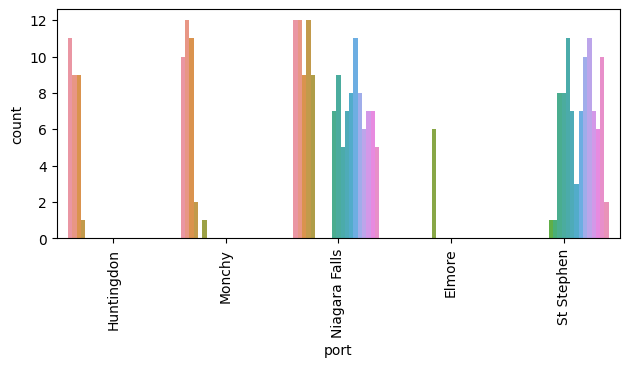

In [72]:
sns.countplot(x='port', data=dfNaValueUS, hue='year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend().remove()

### 2.6.2 Distribution. Normal or not?

In [73]:
le_month = LabelEncoder()
le_port = LabelEncoder()
le_region = LabelEncoder()

label_encoding_month = le_month.fit_transform(df1['month'])
df1['month_le'] = label_encoding_month
label_encoding_port = le_port.fit_transform(df1['port'])
df1['port_le'] = label_encoding_port
label_encoding_region = le_region.fit_transform(df1['region'])
df1['region_le'] = label_encoding_region

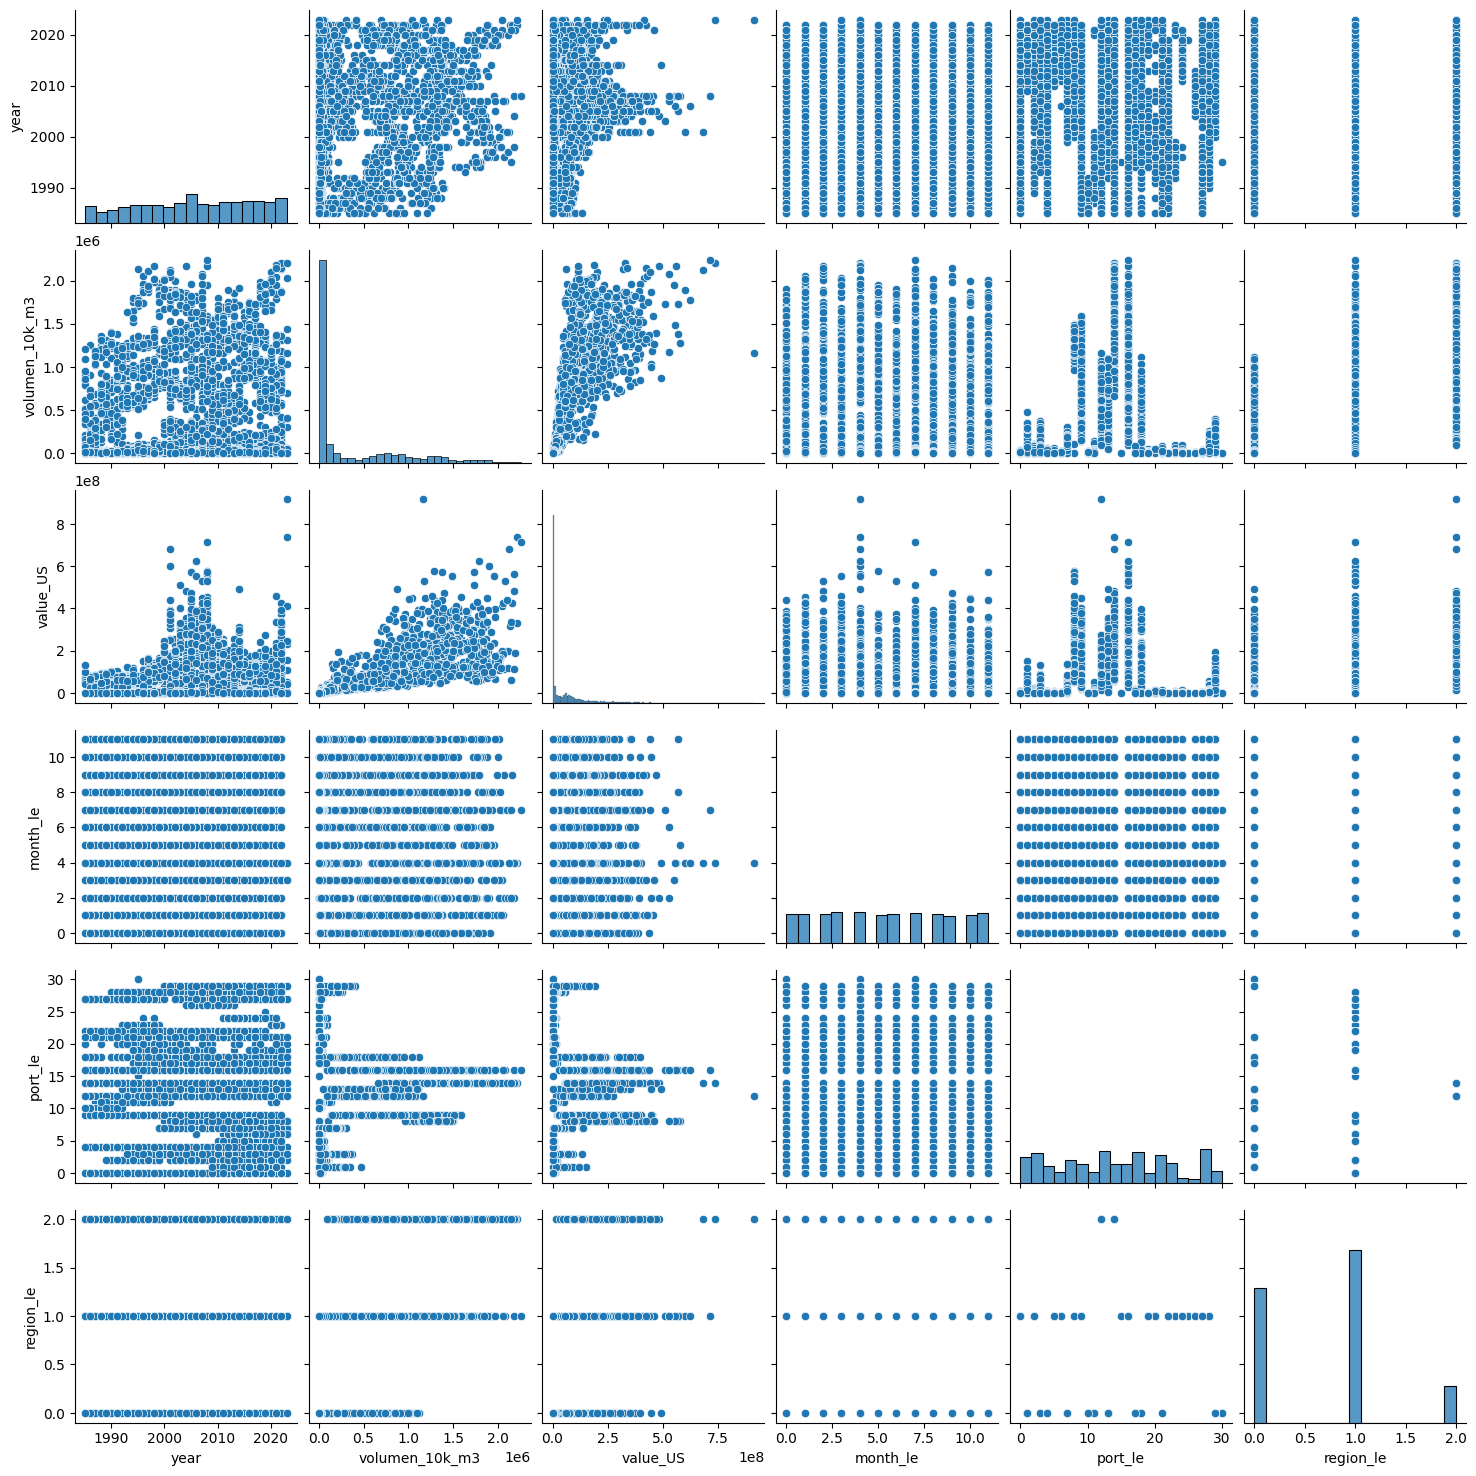

In [74]:
sns.pairplot(df1.sample(frac=0.5)[['year', 'volumen_10k_m3', 'value_US', 'month_le', 'port_le', 'region_le']])

Shapiro test

In [75]:
print("df1.year: ", stats.shapiro(df1.year.sample(n=5000)))
print("df1.month_le: ", stats.shapiro(df1.month_le.sample(n=5000)))
print("df1.region_le: ", stats.shapiro(df1.region_le.sample(n=5000)))
print("df1.port_le: ", stats.shapiro(df1.port_le.sample(n=5000)))
print("df1.volumen_10k_m3: ", stats.shapiro(df1.volumen_10k_m3.sample(n=5000)))
print("df1.value_US: ", stats.shapiro(df1.value_US.sample(n=5000).dropna()))

df1.year:  ShapiroResult(statistic=0.9607059955596924, pvalue=8.630568489374138e-35)
df1.month_le:  ShapiroResult(statistic=0.9417051672935486, pvalue=1.4571261951435178e-40)
df1.region_le:  ShapiroResult(statistic=0.7703619003295898, pvalue=0.0)
df1.port_le:  ShapiroResult(statistic=0.9564906358718872, pvalue=3.083262347866764e-36)
df1.volumen_10k_m3:  ShapiroResult(statistic=0.7049487233161926, pvalue=0.0)
df1.value_US:  ShapiroResult(statistic=0.614201545715332, pvalue=0.0)


Shapiro test:
We reject the Null hypothesis (H0).


Anderson-Darling Test

Note: Just in case, I applied for the Anderson-Darling test. Result, the returned statistic is larger than these critical values (for the corresponding significance level 15%, 10%, 5%, 2.5%, 1%), the null hypothesis from the normal distribution can be rejected.

In [76]:
print("df1.year: ", stats.anderson(df1.year, dist='norm'))
print("df1.month_le: ", stats.anderson(df1.month_le, dist='norm'))
print("df1.region_le: ", stats.anderson(df1.region_le, dist='norm'))
print("df1.port_le: ", stats.anderson(df1.port_le, dist='norm'))
print("df1.volumen_10k_m3: ", stats.anderson(df1.volumen_10k_m3, dist='norm'))
print("df1.value_US: ", stats.anderson(df1.value_US.dropna(), dist='norm'))

df1.year:  AndersonResult(statistic=84.98599800405282, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2005.400164435048, scale=10.539090808614276)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
df1.month_le:  AndersonResult(statistic=130.179918769305, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.496124031007752, scale=3.446191095434835)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
df1.region_le:  AndersonResult(statistic=866.9368249752861, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7101245008221753, scale=0.6489007292876178)
 success: True
 message: '`anderson` successfully fit the dis

Both test affirm the null hypothesis is rejected as Normal distrubution.

### 2.6.3 Correlations

Comparison of Pearson and Spearman coefficients. The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.

In summary, correlation coefficients are used to assess the strength and direction of the linear relationships between pairs of variables. When both variables are normally distributed use Pearson's correlation coefficient, otherwise use Spearman's correlation coefficient.

<ipython-input-77-4cb4a666ce5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(method="spearman"), annot=True, cmap="BrBG", center=0)


<Axes: xlabel='0', ylabel='0'>

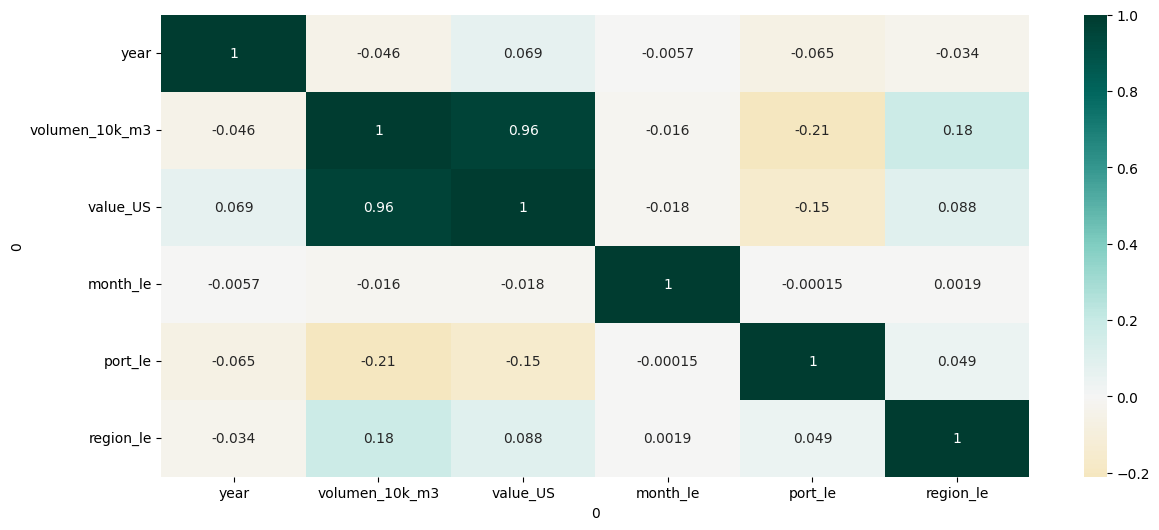

In [77]:
plt.figure(figsize=(14,6))
sns.heatmap(df1.corr(method="spearman"), annot=True, cmap="BrBG", center=0)

Value_US ~ volumen_10k_m3 + port_le

Volumen_10k_m3 ~ value_US + port_le + region_le

As the consequence of this relationship (value_US ~ volumen_10k_m3), we have to avoid observations where both are missed.

## 2.7. Handling Missing Values

### 2.7.1 Value_US. Defining dataframes with/without NAs.

<p><b>Value_US ~ volumen_10k_m3 + port_le</b></p>

In [78]:
df1NAs = df1[df1.value_US.isna()].reset_index(drop=True)
df1notNAs = df1[~df1.value_US.isna()].reset_index(drop=True)

### 2.7.2 Value_US. Applying Standardization.

The data don't follow a Gaussian distribution and there are outliers.

In [79]:
scaler_vm3 = RobustScaler()
scaler_vus = RobustScaler()

scaled_vm3 = scaler_vm3.fit_transform(df1notNAs['volumen_10k_m3'].values.reshape(-1,1))
scaled_vus = scaler_vus.fit_transform(df1notNAs['value_US'].values.reshape(-1,1))

data_scaled = pd.DataFrame({'volumen_10k_m3_MMS':np.concatenate(scaled_vm3),
                            'value_US_MMS':np.concatenate(scaled_vus),
                            'port_le':df1notNAs.port_le})

### 2.7.3. Value_US. Finding the best model.

<p>Analyzing our dataset we can build diverse models. Thus, we will apply the following:</p>

<H3><b>Supervised</b></H3>

<b>Models</b>
<ul>
  <li>Linear regression</li>
  <li>Polynomial regression</li>
</ul>

<b>Dividing data into train and test categories.</b>

In [80]:
x = data_scaled.drop('value_US_MMS', axis=1).values
y = data_scaled['value_US_MMS'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

<b>Linear Regression</b>


In [81]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict_test = lr.predict(x_test)

mse_test = mean_squared_error(y_test, y_predict_test)
r2s_test = r2_score(y_test, y_predict_test)

In [82]:
print(f"The mean squeare error is: {mse_test:.4f}")
print(f"Meanwhile, R^2 score (coefficient of determination) is: {r2s_test:.4f}")

The mean squeare error is: 0.7362
Meanwhile, R^2 score (coefficient of determination) is: 0.6366


<b>Polynomial Regression</b>


In [83]:
mse_test_list = []
r2score_test_list = []
models = []

# 2nd value inside range is the max degree for our polynimial regression!!
for degree in range(1, 21):
    poly = PolynomialFeatures(degree=degree)

    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)

    y_predict_test = lr.predict(x_test_poly)

    mse_test = mean_squared_error(y_test, y_predict_test)
    r2s_test = r2_score(y_test, y_predict_test)

    mse_test_list.append(mse_test)
    r2score_test_list.append(r2s_test)
    models.append(lr)

    if degree == 1:
        min_mse = [degree, mse_test]
        max_r2s = [degree, r2s_test]

    if min_mse[1] > mse_test:
        min_mse = [degree, mse_test]

    if max_r2s[1] < r2s_test:
        max_r2s = [degree, r2s_test]

In [84]:
print("The polynomial degree which has the lowest mean squeare error is (degree, mse): ", min_mse)
print("Meanwhile, R^2 score (coefficient of determination) which has the highest value is (degree, r2s): ", max_r2s)

The polynomial degree which has the lowest mean squeare error is (degree, mse):  [7, 0.6586491099973306]
Meanwhile, R^2 score (coefficient of determination) which has the highest value is (degree, r2s):  [7, 0.6748962102790996]


### 2.7.4 Value_US. Completing NAs.

<b>Normalizing df1NAs</b>

In [85]:
scaled_vm3 = scaler_vm3.transform(df1NAs['volumen_10k_m3'].values.reshape(-1,1))

df1NAs_norm = pd.DataFrame({'volumen_10k_m3_MMS':np.concatenate(scaled_vm3),
                            'port_le':df1NAs.port_le})

In [86]:
df1NAs_norm.head()

,volumen_10k_m3_MMS,port_le
0,0.623403,12
1,0.891160,16
2,0.095731,18
3,0.515202,12
4,0.993473,16


<b>Getting the best model</b>

In [87]:
best_model = models[max_r2s[0]-1]

poly = PolynomialFeatures(degree=max_r2s[0])

<b>Predicting</b>

In [88]:
input = poly.fit_transform(df1NAs_norm)

prediction = best_model.predict(input)

In [89]:
result = scaler_vus.inverse_transform(prediction.reshape(-1, 1))
result = pd.DataFrame(result, columns=['value_US'])
result.head()

,value_US
0,5.389832e+07
1,6.872590e+07
2,1.473243e+07
3,4.473522e+07
4,7.810180e+07


In [90]:
result[result.value_US < 0]

,value_US
130,-2.511493e+06
133,-3.433934e+06
134,-2.900216e+06
135,-3.166388e+06
136,-3.438939e+06
...,...
281,-2.063811e+06
282,-2.043102e+06
284,-3.503609e+06
288,-3.502249e+06


<b>Replacing NAs from value_US</b>

In [91]:
df2 = [df1notNAs, df1NAs.drop(['value_US'], axis=1).join(result)]
df2 = pd.concat(df2, ignore_index=True)
df2.drop(['month_le', 'port_le', 'region_le'], axis=1, inplace=True)

In [92]:
df2.head()

,year,month,port,region,volumen_10k_m3,value_US
0,1985,January,Aden,MidWest,26265.9,2.815168e+06
1,1985,January,Cornwall,East,31849.5,4.331851e+06
2,1985,January,Emerson,MidWest,415051.0,5.174235e+07
3,1985,January,Fort Frances,East,11125.9,1.508023e+06
4,1985,January,Kingsgate,West,1203424.5,1.338250e+08


In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8514 entries, 0 to 8513
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            8514 non-null   int64   
 1   month           8514 non-null   category
 2   port            8514 non-null   object  
 3   region          8514 non-null   category
 4   volumen_10k_m3  8514 non-null   float64 
 5   value_US        8514 non-null   float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 283.3+ KB


In [94]:
df2.describe(include='all')

,year,month,port,region,volumen_10k_m3,value_US
count,8514.000000,8514,8514,8514,8.514000e+03,8.514000e+03
unique,NaN,12,31,3,NaN,NaN
top,NaN,January,Huntingdon,MidWest,NaN,NaN
freq,NaN,739,458,4214,NaN,NaN
mean,2005.400164,NaN,NaN,NaN,3.474265e+05,4.730121e+07
std,10.539091,NaN,NaN,NaN,5.261034e+05,8.676927e+07
min,1985.000000,NaN,NaN,NaN,2.000000e+00,-3.503960e+06
25%,1997.000000,NaN,NaN,NaN,9.457700e+03,1.036042e+06
50%,2006.000000,NaN,NaN,NaN,3.370335e+04,4.523399e+06
75%,2015.000000,NaN,NaN,NaN,6.408859e+05,6.127496e+07


All negavite value_US values came from volumen_10k_m3 with lower values. To avoid any problem (these values are not credible) they will be deleted.

In [95]:
df2.drop(df2.loc[df2.value_US < 0].index, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [96]:
df2.describe(include='all')

,year,month,port,region,volumen_10k_m3,value_US
count,8448.000000,8448,8448,8448,8.448000e+03,8.448000e+03
unique,NaN,12,31,3,NaN,NaN
top,NaN,January,Monchy,MidWest,NaN,NaN
freq,NaN,736,458,4214,NaN,NaN
mean,2005.311080,NaN,NaN,NaN,3.501167e+05,4.768931e+07
std,10.528255,NaN,NaN,NaN,5.272700e+05,8.699592e+07
min,1985.000000,NaN,NaN,NaN,2.000000e+00,2.051200e+02
25%,1997.000000,NaN,NaN,NaN,9.722976e+03,1.071194e+06
50%,2006.000000,NaN,NaN,NaN,3.448321e+04,4.665992e+06
75%,2014.000000,NaN,NaN,NaN,6.468312e+05,6.175846e+07


# <H2><b>3. Predictions to future exportations by Region between 2023 and 2025</H2></b>

In [97]:
df = pd.pivot_table(df2, columns=['year','month','region'], values=['volumen_10k_m3','value_US'], aggfunc=np.sum).transpose().reset_index()
df = df[df.year < 2023]

In [98]:
df_toPredict = pd.pivot_table(df2, columns=['month','region'], values='value_US', aggfunc=np.sum).transpose().reset_index()[['month','region']]
df_toPredict = pd.DataFrame([x for x in range(2023,2026)]).merge(df_toPredict, how='cross')
df_toPredict.rename(columns={0:'year'}, inplace=True)

In [99]:
df = pd.concat([df, df_toPredict])

In [100]:
df.head()

,year,month,region,value_US,volumen_10k_m3
0,1985,January,East,2.374436e+07,161910.4
1,1985,January,MidWest,1.238030e+08,1060851.2
2,1985,January,West,1.877233e+08,1644626.5
3,1985,February,East,2.113334e+07,136882.3
4,1985,February,MidWest,1.450583e+08,1226750.9


In [101]:
def one_hot_encoding(df, column):
    df_copy = df.copy()
    # LabelEncoder
    le = LabelEncoder()
    label_encoding = le.fit_transform(df_copy[column])

    # OneHotEncoder
    onehot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoding = onehot_encoder.fit_transform(label_encoding.reshape(-1, 1))

    one_hot_encoding_df = pd.DataFrame(one_hot_encoding, columns=le.classes_, dtype=int)
    one_hot_encoding_df = one_hot_encoding_df.add_prefix(column+'_')

    df_copy = df_copy.join(one_hot_encoding_df)
    df_copy = df_copy.drop([column], axis=1)

    return df_copy, label_encoding, one_hot_encoding

In [102]:
df, le_month, ohe_month = one_hot_encoding(df, 'month')
df, le_region, ohe_region = one_hot_encoding(df, 'region')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
df.head()

,year,value_US,volumen_10k_m3,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,region_East,region_MidWest,region_West
0,1985,2.374436e+07,161910.4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
0,2023,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1985,1.238030e+08,1060851.2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2023,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1985,1.877233e+08,1644626.5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [104]:
df_toPredict = df[df.year >= 2023]
df = df[df.year < 2023]

In [105]:
scaler_vm3 = RobustScaler()
scaler_vus = RobustScaler()

scaled_vm3 = scaler_vm3.fit_transform(df['volumen_10k_m3'].values.reshape(-1,1))
scaled_vus = scaler_vus.fit_transform(df['value_US'].values.reshape(-1,1))

data_scaled = pd.DataFrame({'volumen_10k_m3_MMS':np.concatenate(scaled_vm3),
                            'value_US_MMS':np.concatenate(scaled_vus)})

df = df.drop(['value_US','volumen_10k_m3'], axis=1).join(data_scaled)

In [106]:
df.head()

,year,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,region_East,region_MidWest,region_West,volumen_10k_m3_MMS,value_US_MMS
0,1985,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-1.417872,-0.627700
1,1985,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.792473,-0.263413
2,1985,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.386336,-0.030696
3,1985,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.435285,-0.637206
4,1985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.677055,-0.186028


Predicting volumen_10k_m3

In [107]:
x = df.drop(['value_US_MMS','volumen_10k_m3_MMS'], axis=1).values
y = df['volumen_10k_m3_MMS'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [108]:
mse_test_list = []
r2score_test_list = []
models = []

# 2nd value inside range is the max degree for our polynimial regression!!
for degree in range(1, 8):
    poly = PolynomialFeatures(degree=degree)

    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)

    y_predict_test = lr.predict(x_test_poly)

    mse_test = mean_squared_error(y_test, y_predict_test)
    r2s_test = r2_score(y_test, y_predict_test)

    mse_test_list.append(mse_test)
    r2score_test_list.append(r2s_test)
    models.append(lr)

    if degree == 1:
        min_mse = [degree, mse_test]
        max_r2s = [degree, r2s_test]

    if min_mse[1] > mse_test:
        min_mse = [degree, mse_test]

    if max_r2s[1] < r2s_test:
        max_r2s = [degree, r2s_test]

In [109]:
print("The polynomial degree which has the lowest mean squeare error is (degree, mse): ", min_mse)
print("Meanwhile, R^2 score (coefficient of determination) which has the highest value is (degree, r2s): ", max_r2s)

The polynomial degree which has the lowest mean squeare error is (degree, mse):  [7, 0.09873552957431085]
Meanwhile, R^2 score (coefficient of determination) which has the highest value is (degree, r2s):  [7, 0.8415117086716487]


In [110]:
df_toPredict.drop(columns=['value_US','volumen_10k_m3'], axis=1, inplace=True)

In [111]:
poly = PolynomialFeatures(degree=max_r2s[0])
input = poly.fit_transform(df_toPredict)

best_model = models[max_r2s[0]-1]
prediction_volumen_10k_m3 = best_model.predict(input)

In [112]:
result = pd.DataFrame(prediction_volumen_10k_m3.reshape(-1, 1), columns=['volumen_10k_m3_MMS'])
result.head()

,volumen_10k_m3_MMS
0,-0.670610
1,-0.670610
2,0.828953
3,0.356518
4,0.242539


In [113]:
df = df.append(df_toPredict.join(result))

<ipython-input-113-a36f643afccc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_toPredict.join(result))


Predicting value_US.

In [114]:
dfNAs = df[df.value_US_MMS.isna()].reset_index(drop=True)
dfnotNAs = df[~df.value_US_MMS.isna()].reset_index(drop=True)

In [115]:
x = dfnotNAs.drop(['value_US_MMS'], axis=1).values
y = dfnotNAs['value_US_MMS'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [116]:
mse_test_list = []
r2score_test_list = []
models = []

# 2nd value inside range is the max degree for our polynimial regression!!
for degree in range(1, 8):
    poly = PolynomialFeatures(degree=degree)

    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)

    y_predict_test = lr.predict(x_test_poly)

    mse_test = mean_squared_error(y_test, y_predict_test)
    r2s_test = r2_score(y_test, y_predict_test)

    mse_test_list.append(mse_test)
    r2score_test_list.append(r2s_test)
    models.append(lr)

    if degree == 1:
        min_mse = [degree, mse_test]
        max_r2s = [degree, r2s_test]

    if min_mse[1] > mse_test:
        min_mse = [degree, mse_test]

    if max_r2s[1] < r2s_test:
        max_r2s = [degree, r2s_test]

In [117]:
print("The polynomial degree which has the lowest mean squeare error is (degree, mse): ", min_mse)
print("Meanwhile, R^2 score (coefficient of determination) which has the highest value is (degree, r2s): ", max_r2s)

The polynomial degree which has the lowest mean squeare error is (degree, mse):  [2, 0.41929386457130846]
Meanwhile, R^2 score (coefficient of determination) which has the highest value is (degree, r2s):  [2, 0.6080061916212263]


In [118]:
poly = PolynomialFeatures(degree=max_r2s[0])
input = poly.fit_transform(dfNAs.drop(['value_US_MMS'], axis=1))

best_model = models[max_r2s[0]-1]
prediction_value_US = best_model.predict(input)

Reversing the RobustScaler.

In [119]:
result = scaler_vus.inverse_transform(prediction_value_US.reshape(-1, 1))
result = pd.DataFrame(result, columns=['value_US'])
result.head()

,value_US
0,2.340225e+08
1,2.340225e+08
2,2.987119e+08
3,2.331123e+08
4,3.909666e+08


In [120]:
df_predictions = dfNAs.join(result)

In [121]:
result = scaler_vm3.inverse_transform(prediction_volumen_10k_m3.reshape(-1, 1))
result = pd.DataFrame(result, columns=['volumen_10k_m3'])
result.head()

,volumen_10k_m3
0,1.236015e+06
1,1.236015e+06
2,3.391465e+06
3,2.712395e+06
4,2.548563e+06


In [122]:
df_predictions = df_predictions.join(result).drop(['volumen_10k_m3_MMS','value_US_MMS'], axis=1)

In [123]:
df_predictions.columns

Index(['year', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'region_East', 'region_MidWest', 'region_West',
       'value_US', 'volumen_10k_m3'],
      dtype='object')

In [124]:
df_predictionsRegionEast = pd.pivot_table(data=df_predictions[df_predictions.region_East == 1], columns=['year'], values=['value_US', 'volumen_10k_m3'], aggfunc=np.sum)
df_predictionsRegionEast

year,2023,2024,2025
value_US,1.925903e+08,-1.430853e+08,-4.813067e+08
volumen_10k_m3,4.668305e+06,3.650515e+06,2.678327e+06


In [125]:
df_predictionsRegionMidWest = pd.pivot_table(data=df_predictions[df_predictions.region_MidWest == 1], columns=['year'], values=['value_US', 'volumen_10k_m3'], aggfunc=np.sum)
df_predictionsRegionMidWest

year,2023,2024,2025
value_US,2.112884e+09,1.540153e+09,9.597800e+08
volumen_10k_m3,3.414487e+07,3.279768e+07,3.142856e+07


In [126]:
df_predictionsRegionWest = pd.pivot_table(data=df_predictions[df_predictions.region_West == 1], columns=['year'], values=['value_US', 'volumen_10k_m3'], aggfunc=np.sum)
df_predictionsRegionWest

year,2023,2024,2025
value_US,4.041240e+09,4.047698e+09,4.071571e+09
volumen_10k_m3,3.208440e+07,3.285999e+07,3.375460e+07


# 4. Conclusions

<p>The models created has an accuracy of 60% in value_US and 84% in volumen_10k_m3. Over this models we predict how the natural gas increse or not over 2023, 2024 and 2025 in the three regions.</p>

<p>The east region is clearly a fall in the exportation becuase the negative numbers, on the other hand, midwest and west contunue increasing.</p>

<p><b>Note</b></p>
<p>We can continue analysing the behaviour and optimazing the models checking some parameters, and mainly we can clean the data set because some month has unreal data (min value in volumen_10k_m3 is 2, that is impossible regarding this market).</p>